In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [8]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [12]:
forest.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

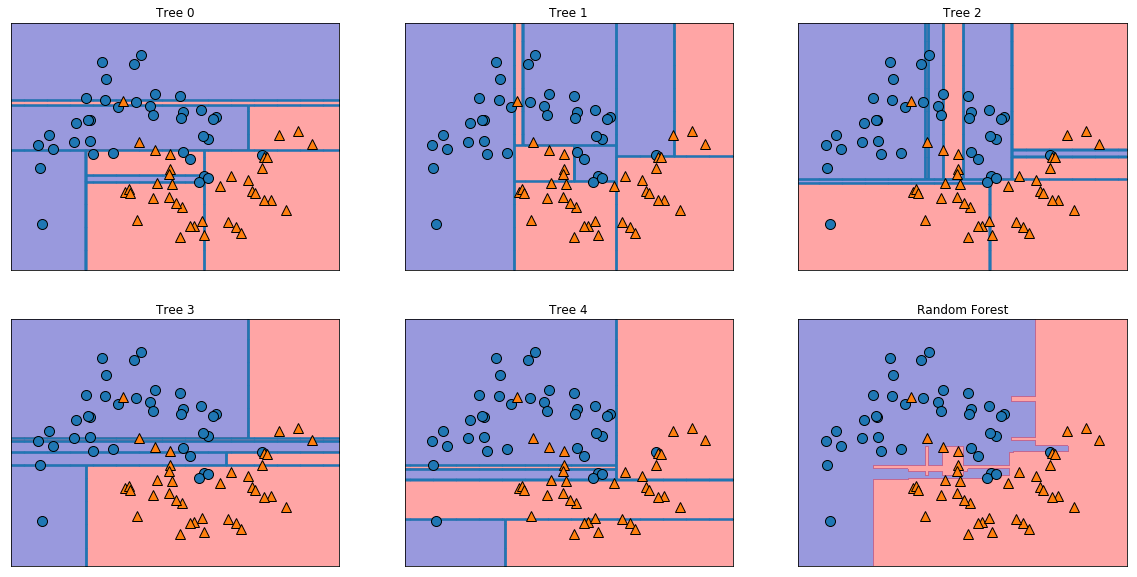

In [10]:
fig, axes = plt.subplots(2, 3,figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [16]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
forest.score(X_train, y_train)

1.0

In [18]:
forest.score(X_test, y_test)

0.972027972027972

在没有调节任何参数的情况下， 随机森林的精度为 97%， 比线性模型或单棵决策树
都要好。 我们可以调节 max_features 参数， 或者像单棵决策树那样进行预剪枝。 但
是， 随机森林的默认参数通常就已经可以给出很好的结果。
与决策树类似， 随机森林也可以给出特征重要性， 计算方法是将森林中所有树的特征
重要性求和并取平均。 一般来说， 随机森林给出的特征重要性要比单棵树给出的更为
可靠。

In [19]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

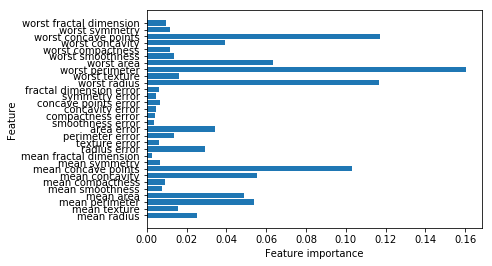

In [20]:
plot_feature_importances_cancer(forest)

与单棵树相比， 随机森林中有更多特征的重要性不为零。 与单棵决策树类
似， 随机森林也给了“worst radius”（ 最大半径） 特征很大的重要性， 但从总体来看，
它实际上却选择“worst perimeter”（ 最大周长） 作为信息量最大的特征。 由于构造随
机森林过程中的随机性， 算法需要考虑多种可能的解释， 结果就是随机森林比单棵树
更能从总体把握数据的特征。

从本质上看， 随机森林拥有决策树的所有优点， 同时弥补了决策树的一些缺陷。 仍然
使用决策树的一个原因是需要决策过程的紧凑表示。 基本上不可能对几十棵甚至上百
棵树做出详细解释， 随机森林中树的深度往往比决策树还要大（ 因为用到了特征子
集） 。 因此， 如果你需要以可视化的方式向非专家总结预测过程， 那么选择单棵决策
树可能更好。 虽然在大型数据集上构建随机森林可能比较费时间， 但在一台计算机的
多个 CPU 内核上并行计算也很容易。 如果你用的是多核处理器（ 几乎所有的现代化
计算机都是） ， 你可以用 n_jobs 参数来调节使用的内核个数。 使用更多的 CPU 内
核， 可以让速度线性增加（ 使用 2 个内核， 随机森林的训练速度会加倍） ， 但设置
n_jobs 大于内核个数是没有用的。 你可以设置 n_jobs=-1 来使用计算机的所有内核。
你应该记住， 随机森林本质上是随机的， 设置不同的随机状态（ 或者不设置
random_state 参数） 可以彻底改变构建的模型。 森林中的树越多， 它对随机状态选
择的鲁棒性就越好。 如果你希望结果可以重现， 固定 random_state 是很重要的。

对于维度非常高的稀疏数据（ 比如文本数据） ， 随机森林的表现往往不是很好。 对于
这种数据， 使用线性模型可能更合适。 即使是非常大的数据集， 随机森林的表现通常
也很好， 训练过程很容易并行在功能强大的计算机的多个 CPU 内核上。 不过， 随机
森林需要更大的内存， 训练和预测的速度也比线性模型要慢。 对一个应用来说， 如果
时间和内存很重要的话， 那么换用线性模型可能更为明智。

需要调节的重要参数有 n_estimators 和 max_features ， 可能还包括预剪枝选项（ 如
max_depth ） 。 n_estimators 总是越大越好。 对更多的树取平均可以降低过拟合， 从
而得到鲁棒性更好的集成。 不过收益是递减的， 而且树越多需要的内存也越多， 训练
时间也越长。 常用的经验法则就是“在你的时间 / 内存允许的情况下尽量多”。
前面说过， max_features 决定每棵树的随机性大小， 较小的 max_features 可以降低
过拟合。 一般来说， 好的经验就是使用默认值： 对于分类， 默认值是
max_features=sqrt(n_features) ； 对于回归， 默认值是 max_features=n_features 。
增大 max_features 或 max_leaf_nodes 有时也可以提高性能。 它还可以大大降低用于
训练和预测的时间和空间要求。